In [1]:
!source activate py36

In [2]:
import sys

sys.path.append('/home/faske/g/anaconda3/envs/py36/lib/python3.6/site-packages')
sys.path.append("/home/faske/g/ipynb/include_utils")

import ipyparallel as ipp
import os, time
import include_utils as u
import pandas as pd
import numpy as np
import scipy as sp
import numbers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
#import vcf
from sklearn import preprocessing
from subprocess import Popen, PIPE, call, check_output
import seaborn as sns
from IPython.display import FileLink
import urllib.request as urllib2
import dill
import traceback
from pandas import Series, DataFrame
import gzip
import warnings
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
%config InlineBackend.figure_format = 'retina'
from Bio import SeqIO
#import pysam
from collections import OrderedDict, namedtuple, Counter
import operator
import multiprocessing as mp
import shutil
import tempfile
#from ipyparallel import Client
import scandir
import glob
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import pickle
#import Levenshtein as lv

In [3]:
vcfutils = "vcfutils.pl"
vcftools = "vcftools"
bcftools = "bcftools"
bgzip = "bgzip"
tabix = "tabix"
java = "java"
plink = "plink --noweb"

In [4]:
LD_dir = '/home/faske/g/milkweed/LD/'

In [5]:
cd $LD_dir

/working/tfaske/milkweed/LD


In [6]:
vcf_file = os.path.join(LD_dir, "good_snps.recode.vcf.gz")
assert os.path.exists(vcf_file)
vcf_file

'/home/faske/g/milkweed/LD/good_snps.recode.vcf.gz'

In [7]:
#make plink files 
#!$vcftools --gzvcf $vcf_file --out $vcf_file --plink --chrom-map {os.path.join(LD_dir, "chrom_map.txt")}
!$vcftools --gzvcf $vcf_file --out $vcf_file --plink


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /home/faske/g/milkweed/LD/good_snps.recode.vcf.gz
	--out /home/faske/g/milkweed/LD/good_snps.recode.vcf.gz
	--plink

Using zlib version: 1.2.11
After filtering, kept 159 out of 159 Individuals
Writing PLINK PED and MAP files ... 

Unrecognized values used for CHROM: AS0.3ch10 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch03 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch01 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch04 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch11 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch06 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch02 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch08 - Replacing with 0.

Unrecognized values used for CHROM: AS0.3ch07 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_14 - Replacing with


Unrecognized values used for CHROM: HiC_scaffold_671 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_673 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_675 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_677 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_679 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_681 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_682 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_684 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_685 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_689 - Replacing with 0.

Unrecognized values used for CHROM: HiC_scaffold_690 - Replacing with 0.
Done.
After filtering, kept 14965 out of a possible 14965 Sites
Run Time = 1.00 seconds


In [8]:
!$plink --file $vcf_file --r2 inter-chr --ld-window-r2 0 --out milkweed
#!$plink --file $vcf_file --r2

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to milkweed.log.
Options in effect:
  --file /home/faske/g/milkweed/LD/good_snps.recode.vcf.gz
  --ld-window-r2 0
  --noweb
  --out milkweed
  --r2 inter-chr

Note: --noweb has no effect since no web check is implemented yet.
515762 MB RAM detected; reserving 257881 MB for main workspace.
.ped scan complete (for binary autoconversion).718181920202122222323242525262727282829303031323233333435353637373838394040414242434444454546474748494950505152525354545555565757585959606161626263646465666667676869697071717272737474757676777778797980818182838384848586868788888989909191929393949495969697989899100%
Performing single-pass .bed write (14965 variants, 159 people).
--file: milkweed-temporary.bed + milkweed-temporary.bim +83940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929

In [36]:
!$vcftools --gzvcf $vcf_file --geno-r2 --out milkweedAll


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /home/faske/g/milkweed/LD/good_snps.recode.vcf.gz
	--max-alleles 2
	--min-alleles 2
	--geno-r2
	--out milkweedAll

Using zlib version: 1.2.11
After filtering, kept 159 out of 159 Individuals
Outputting Pairwise LD (bi-allelic only)
After filtering, kept 14965 out of a possible 14965 Sites
Run Time = 646.00 seconds


# R calculation

In [37]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [38]:
%%R
require(data.table)
require(readr)
require(ggplot2)

ld_all <- fread("~/g/milkweed/LD/milkweedAll.geno.ld", header=TRUE)
Pop_ID <- read.csv('~/g/milkweed/LD/Pop_ID.csv')

In [39]:
%%R 
ld_all[1:10,]

          CHR POS1  POS2 N_INDV        R^2
 1: AS0.3ch10 8393 19771    151 0.02108900
 2: AS0.3ch10 8393 39389    155 0.00477101
 3: AS0.3ch10 8393 46628    156 0.02943080
 4: AS0.3ch10 8393 46734    156 0.40763400
 5: AS0.3ch10 8393 52559    152 0.15797500
 6: AS0.3ch10 8393 66299    154 0.00248144
 7: AS0.3ch10 8393 76971    154 0.00127625
 8: AS0.3ch10 8393 86751    156 0.58840300
 9: AS0.3ch10 8393 93996    134 0.81299600
10: AS0.3ch10 8393 98124    155 0.00384654


In [41]:
%%R 
vcftools_ld <- function(ld,pheno){
    dist_vector <- abs(ld$POS1 - ld$POS2)
    
    print(paste('Number of pairwise comparisions = ',length(dist_vector),sep=''))
## calculating ld decay (https://jujumaan.com/2017/07/15/linkage-disequilibrium-decay-plot/)

    crap_data_file <- cbind(dist_vector, ld[,5])
    colnames(crap_data_file) <- c("dist", "rsq")
    file <- as.data.frame(crap_data_file)
    attach(file)
    n <- nrow(pheno) *2 ## ninds * 2
    Cstart <- c(C=0.1)
    modelC <- nls(rsq ~ ((10+C*dist)/((2+C*dist)*(11+C*dist)))*(1+((3+C*dist)*(12+12*C*dist+(C*dist)^2))/(n*(2+C*dist)*(11+C*dist))), data=file, start=Cstart, control=nls.control(maxiter=100))

    rho <- summary(modelC)$parameters[1]


    newrsq <- ((10+rho*file$dist)/((2+rho*file$dist)*(11+rho*file$dist)))*(1+((3+rho*file$dist)*(12+12*rho*file$dist+(rho*file$dist)^2))/(n*(2+rho*file$dist)*(11+rho*file$dist)))
    newfile <- data.frame(file$dist, newrsq)

    maxld <- max(newfile$newrsq) #using max LD value from adjusted data
    halfdecay = maxld*0.5
    halfdecaydist <- newfile$file.dist[which.min(abs(newfile$newrsq-halfdecay))]
    newfile <- newfile[order(newfile$file.dist),]


    f1 <- data.frame(newfile$file.dist, newfile$newrsq)
    xval <- f1[which.min(abs(0.2 - f1$newfile.newrsq)),] #find x value where y=0.2
    print(paste(expression(italic(r)^2),'decay =', xval[1,1],sep = ' '))


    par(mar=c(5,5,1,1))
    plot(file$dist, file$rsq, pch=21, cex=0.5, xlab="Distance (kbp)", ylab=expression(italic(r)^2), cex.lab=1.5, cex.axis=1.5, las=1, bg="gray40", lwd=0, xaxt="n")
    axis(1, at=c(0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000), labels=c(0, 500, 1000, 1500, 2000, 2500, 3000), cex.axis=1.5)
    lines(newfile$file.dist, newfile$newrsq, col="red", lwd=3)
    abline(h=0.2, lty=2, lwd=3)
    box(lwd=2)
    detach(file)
}

# LD ALL 


[1] "Number of pairwise comparisions = 8721260"
[1] "italic(r)^2 decay = 5736813"


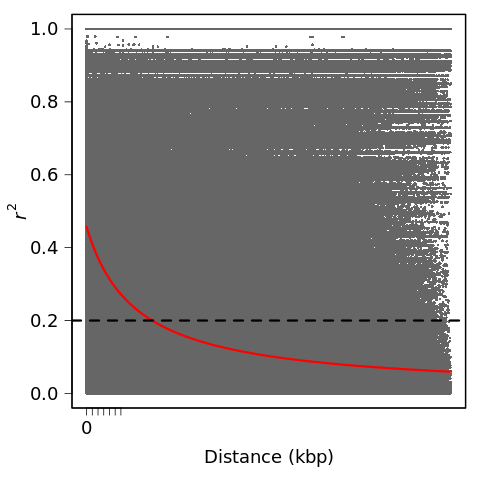

In [42]:
%%R
vcftools_ld(ld_all,Pop_ID)

# milkweed ld

[1] "Number of pairwise comparisions = 101264549"
[1] "italic(r)^2 decay = 6996737"


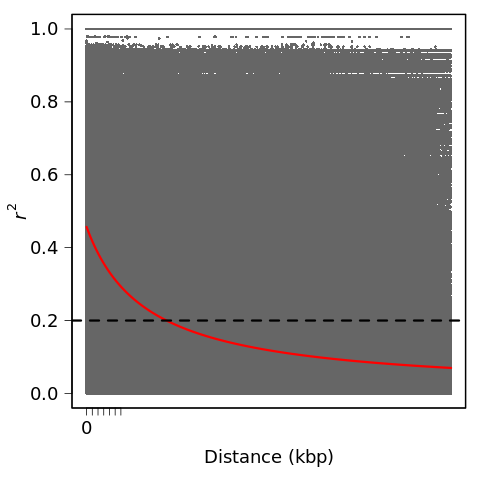

In [33]:
%%R
vcftools_ld(ld,Pop_ID)